<a href="https://colab.research.google.com/github/PedroLucasMendes/ClustLoRa/blob/main/AnaliseLoRaMiniSom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
,.!pip install minisomo5

In [ ]:
#Importes
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from minisom import MiniSom

In [ ]:
def convertendoLogParaDataFrame(arq):
  vetor_dicio = []

  with open(arq,'r') as data:
      linhas = data.readlines()
      for linha in linhas:
        nova_linha = linha.split(";")
        if(nova_linha[1] != "SEMPACTRC\n"):
          dicio_info = {}
          dicio_info["Hora"] =by nova_linha[0]
          dicio_info["SF"] = nova_linha[1]
          dicio_info["BW"] = nova_linha[2]
          dicio_info["PT"] = nova_linha[3]
          dicio_info["RSSI"] = nova_linha[4]
          dicio_info["SNR"] = nova_linha[5].replace("\n","")
          vetor_dicio.append(dicio_info)
  df = pd.DataFrame.from_dict(vetor_dicio)
  return df

In [ ]:

df1 = convertendoLogParaDataFrame("experimento1.log")
df2 = convertendoLogParaDataFrame("experimento2.txt")
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10191 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hora    10191 non-null  object
 1   SF      10191 non-null  object
 2   BW      10191 non-null  object
 3   PT      10191 non-null  object
 4   RSSI    10191 non-null  object
 5   SNR     10191 non-null  object
dtypes: object(6)
memory usage: 557.3+ KB


In [ ]:
df['SF'] = pd.to_numeric(df['SF'], errors='coerce')
df['BW'] = pd.to_numeric(df['BW'], errors='coerce')
df['PT'] = pd.to_numeric(df['PT'], errors='coerce')
df['RSSI'] = pd.to_numeric(df['RSSI'], errors='coerce')
df['SNR'] = pd.to_numeric(df['SNR'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10191 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hora    10191 non-null  object 
 1   SF      10191 non-null  int64  
 2   BW      10191 non-null  float64
 3   PT      10191 non-null  int64  
 4   RSSI    10191 non-null  float64
 5   SNR     10191 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 557.3+ KB


array([[<Axes: title={'center': 'SF'}>, <Axes: title={'center': 'BW'}>],
       [<Axes: title={'center': 'PT'}>, <Axes: title={'center': 'RSSI'}>],
       [<Axes: title={'center': 'SNR'}>, <Axes: >]], dtype=object)

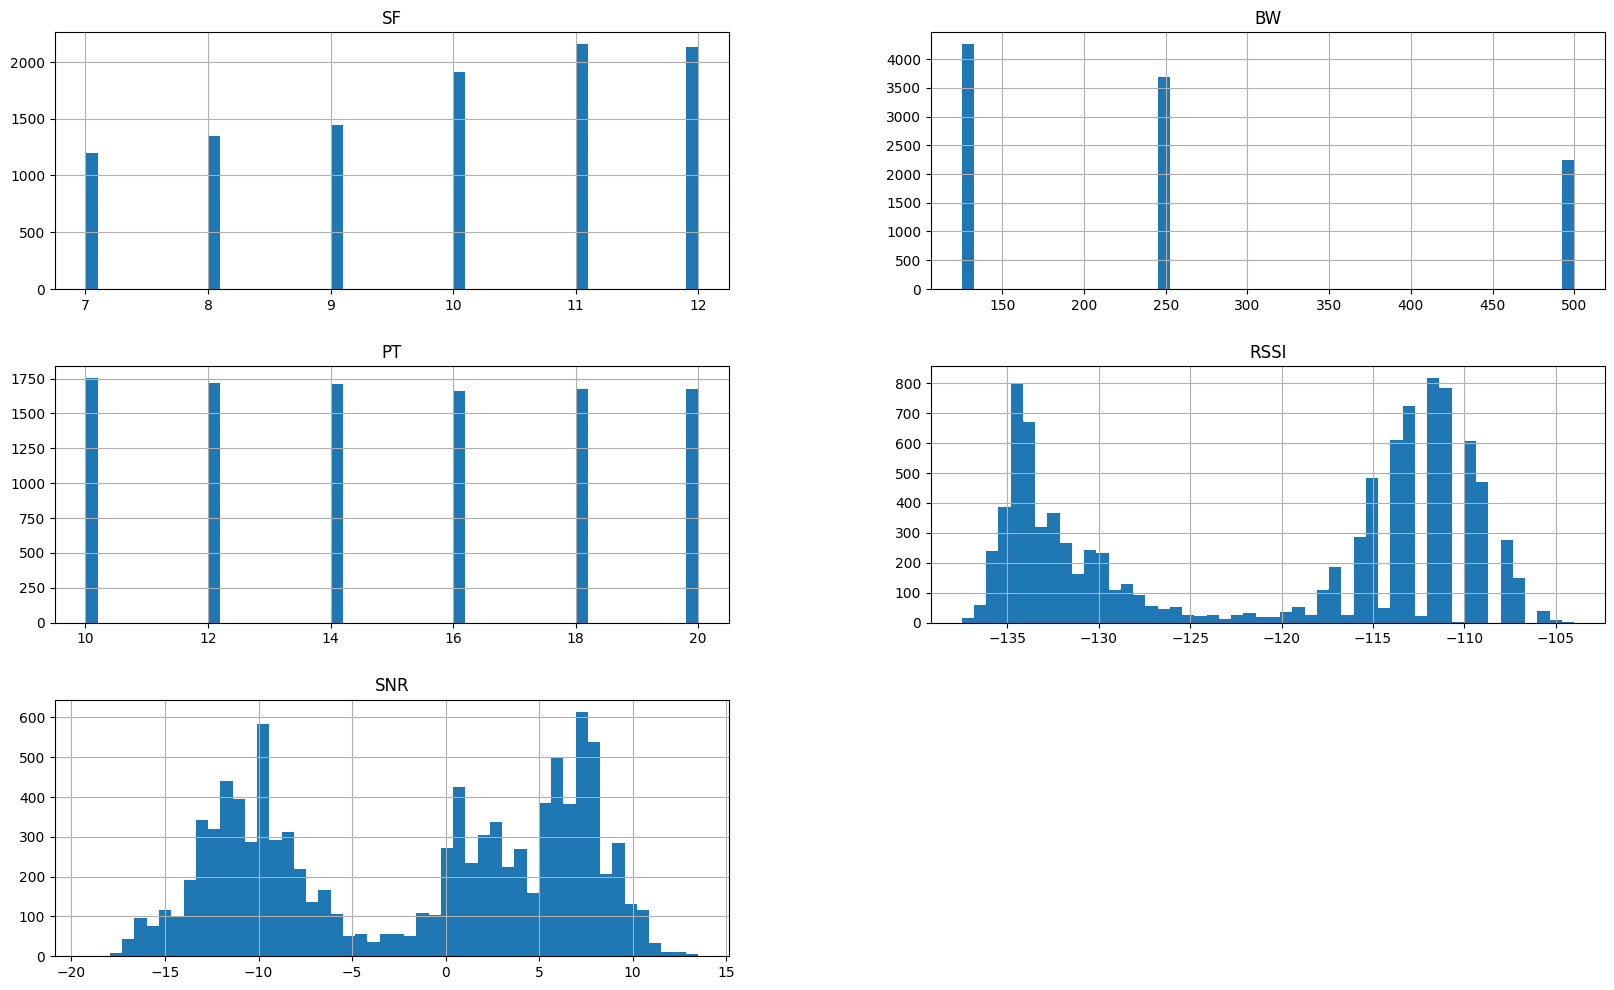

In [ ]:
df.hist(bins=50, figsize=(20,12))

<Axes: xlabel='SF', ylabel='SNR'>

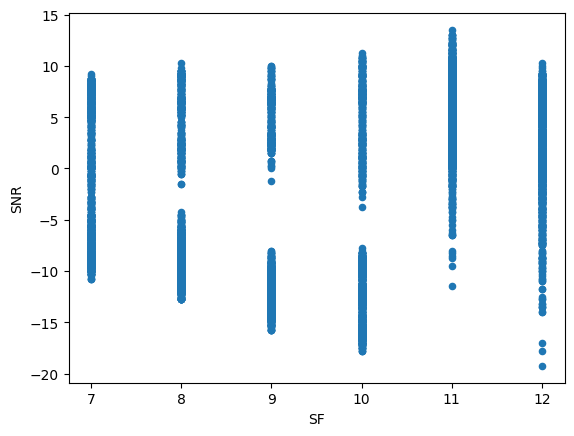

In [ ]:
df.plot(kind="scatter", x="SF", y="SNR")

<Axes: xlabel='SNR', ylabel='RSSI'>

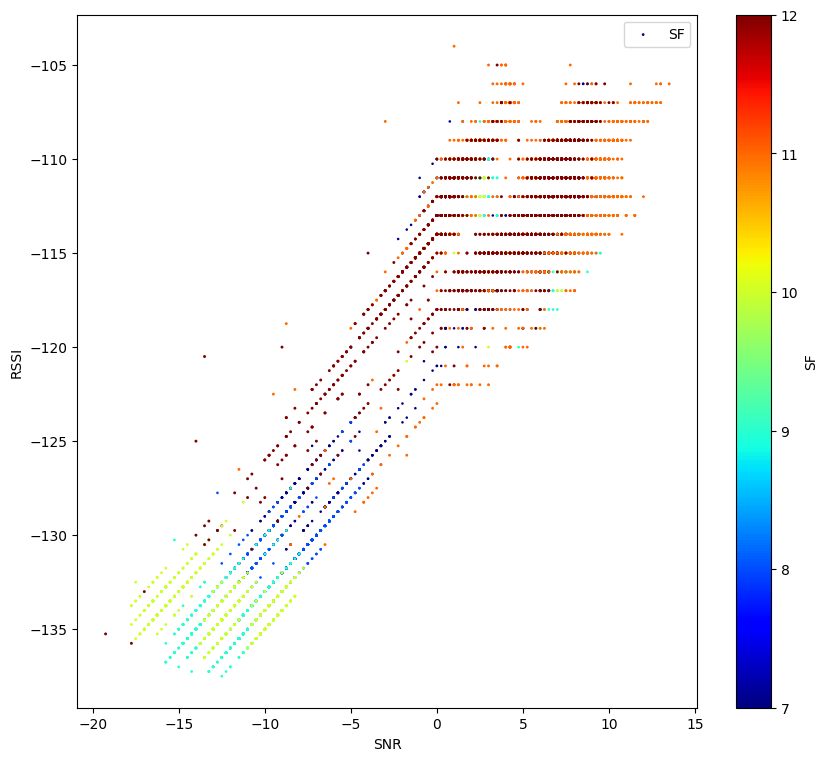

In [ ]:
df.plot(kind="scatter", x="SNR", y="RSSI", alpha=1, s=df["SF"]/10, label='SF', c="SF" ,figsize=(10,9), cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
df['SF_BW_PT'] = df['SF'].astype(str) + '_' + df['BW'].astype(str) + '_' + df['PT'].astype(str)
df['SF_BW_PT']

0        7125.010
1        7125.010
2        7125.010
3        7125.010
4        7125.010
          ...    
8036    12500.020
8037    12500.020
8038    12500.020
8039    12500.020
8040    12500.020
Name: SF_BW_PT, Length: 10191, dtype: object